In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
import random
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import pickle
%matplotlib inline

In [2]:
def plot_mean(values):
    samples, iters = len(values), len(values[0])
    iter_range = range(1, iters + 1)
    val = np.mean(values, axis=0)
    err = 1.96 * np.std(values, axis=0) / np.sqrt(samples)
    plt.plot(iter_range, val)
    plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')
    
def compare(values_list, ylabel='', legend=[]):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    plt.ylim(0., np.max(values_list) * 1.01)
    for values in values_list:
        plot_mean(values)
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.grid()
    plt.show()

def phi_experiment_res(path_base, path_unbiased):
    d = {}
    with open(path_base, 'r') as f:
        d['base_res'] = pickle.load(f)
    with open(path_unbiased, 'r') as f:
        d['unbiased_res'] = pickle.load(f)
    
    compare(
        [
            d['base_res']['train_perplexities'], 
            d['base_res']['test_perplexities'],
            d['unbiased_res']['train_perplexities'], 
            d['unbiased_res']['test_perplexities']
        ],
        'Perplexity',
        [
            'base train_perplexities', 
            'base test_perplexities',
            'unbiased train_perplexities', 
            'unbiased test_perplexities'
        ]
    )
    
    compare(
        [
            d['base_res']['topic_correlations'], 
            d['unbiased_res']['topic_correlations']
        ],
        'Topic correlations',
        [
            'base topic_correlations', 
            'unbiased topic_correlations'
        ]
    )
    
    compare(
        [
            d['base_res']['sparsities'], 
            d['unbiased_res']['sparsities']
        ],
        'Phi sparsity',
        [
            'base sparsity', 
            'unbiased sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['theta_sparsities'], 
            d['unbiased_res']['theta_sparsities']
        ],
        'Theta sparsity',
        [
            'base theta sparsity', 
            'unbiased theta sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_pmis'], 
            d['unbiased_res']['avg_top5_pmis']
        ],
        'Top5 PMI',
        [
            'base avg_top5_pmis', 
            'unbiased avg_top5_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_pmis'], 
            d['unbiased_res']['avg_top10_pmis']
        ],
        'Top10 PMI',
        [
            'base avg_top10_pmis', 
            'unbiased avg_top10_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_pmis'], 
            d['unbiased_res']['avg_top20_pmis']
        ],
        'Top20 PMI',
        [
            'base avg_top20_pmis', 
            'unbiased avg_top20_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top30_pmis'], 
            d['unbiased_res']['avg_top30_pmis']
        ],
        'Top30 PMI',
        [
            'base avg_top30_pmis', 
            'unbiased avg_top30_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_ppmis'], 
            d['unbiased_res']['avg_top5_ppmis']
        ],
        'Top5 PPMI',
        [
            'base avg_top5_ppmis', 
            'unbiased avg_top5_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_ppmis'], 
            d['unbiased_res']['avg_top10_ppmis']
        ],
        'Top10 PPMI',
        [
            'base avg_top10_ppmis', 
            'unbiased avg_top10_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_ppmis'], 
            d['unbiased_res']['avg_top20_ppmis']
        ],
        'Top20 PPMI',
        [
            'base avg_top20_ppmis', 
            'unbiased avg_top20_ppmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top30_ppmis'], 
            d['unbiased_res']['avg_top30_ppmis']
        ],
        'Top30 PPMI',
        [
            'base avg_top30_ppmis', 
            'unbiased avg_top30_ppmis'
        ]
    )

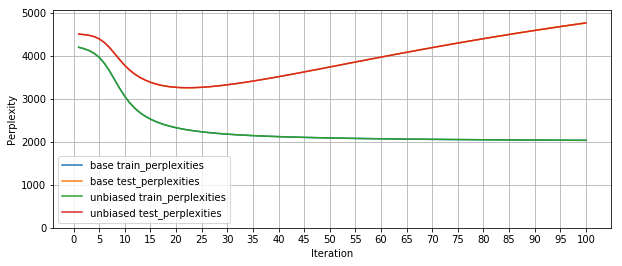

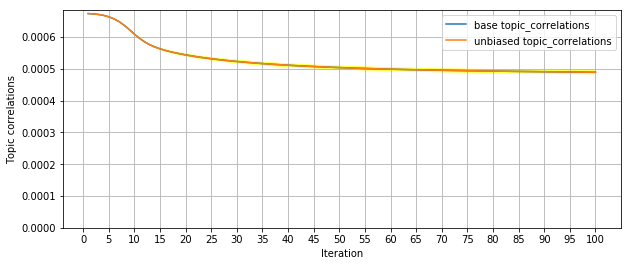

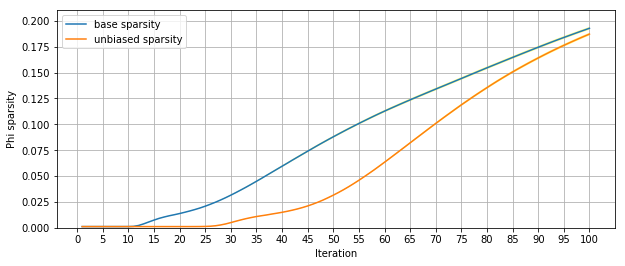

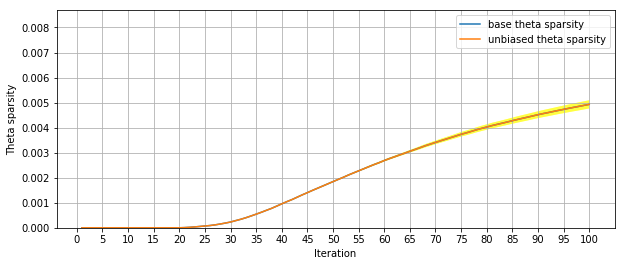

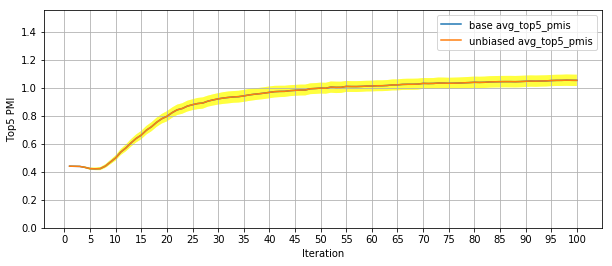

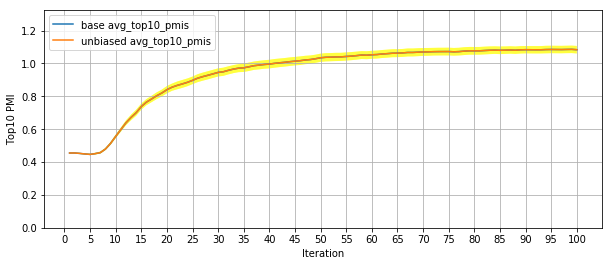

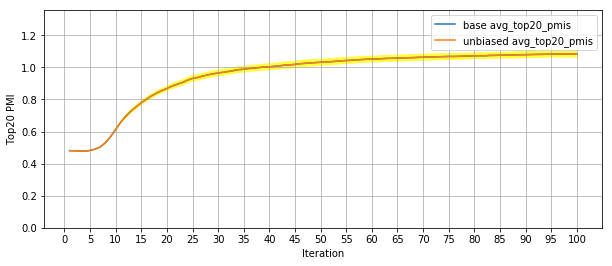

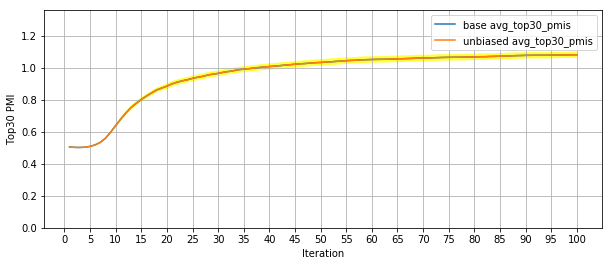

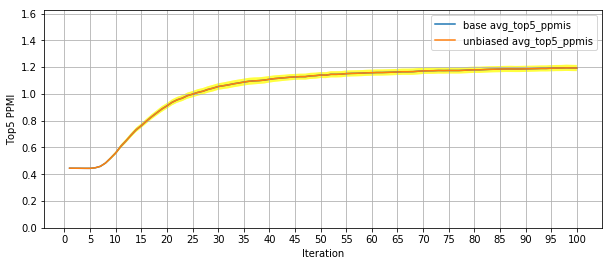

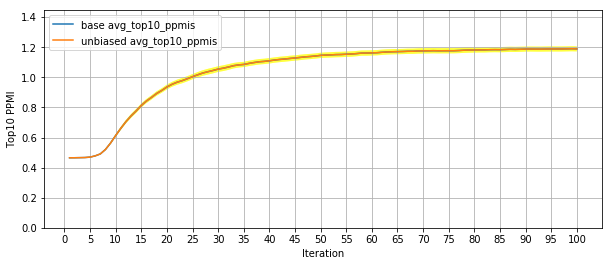

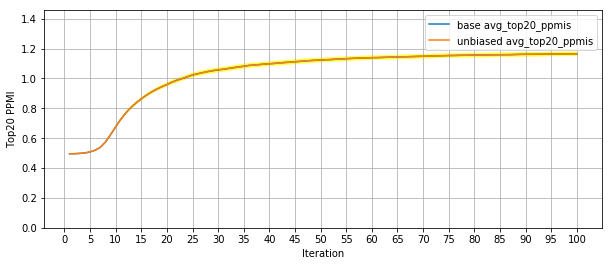

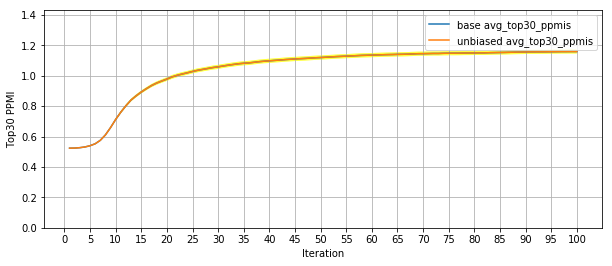

In [3]:
phi_experiment_res('20news_experiment/20news_10t_1000_0_True.pkl', '20news_experiment/20news_10t_1000_0_False.pkl')

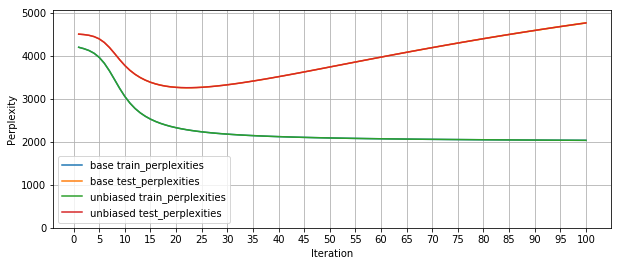

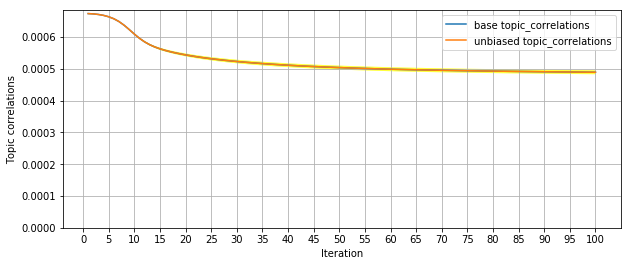

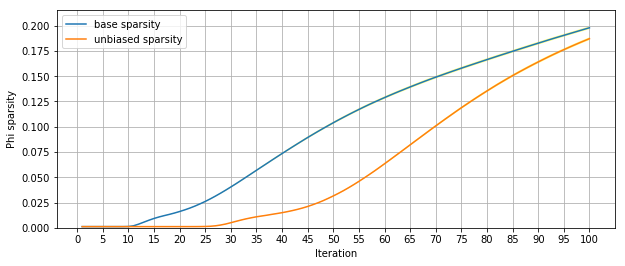

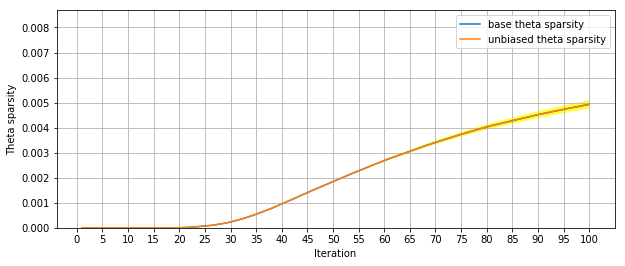

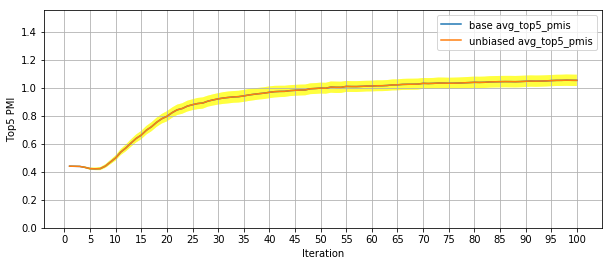

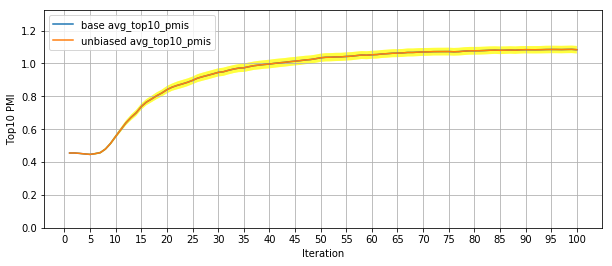

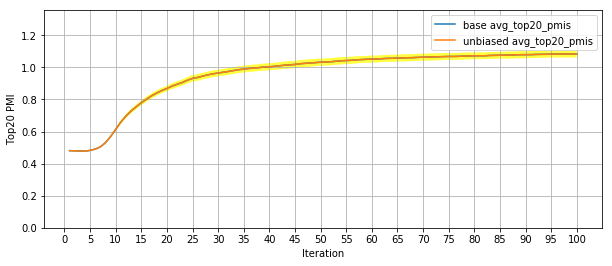

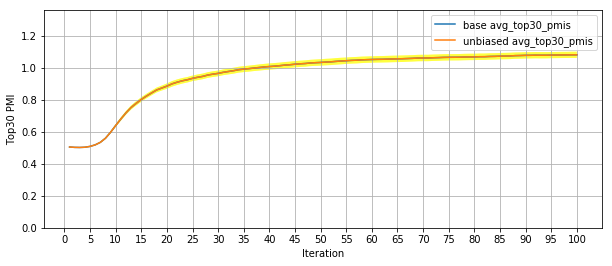

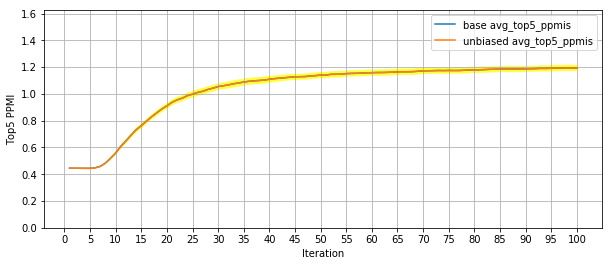

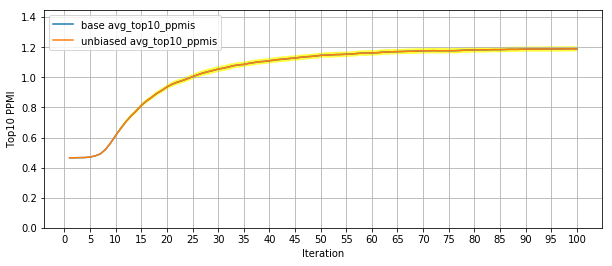

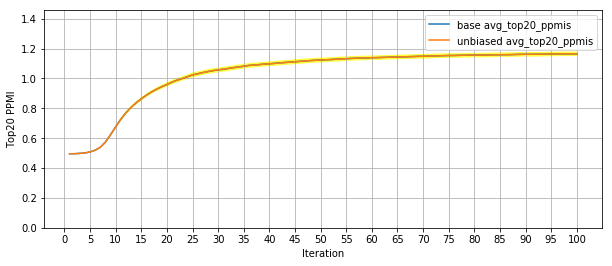

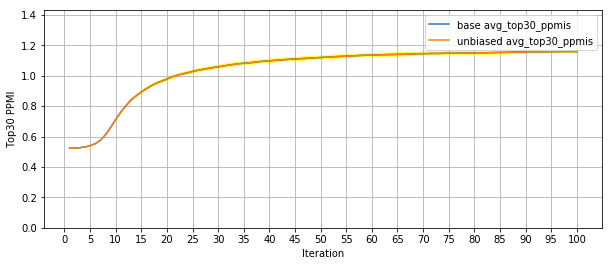

In [4]:
phi_experiment_res('20news_experiment/20news_10t_10000_0_True.pkl', '20news_experiment/20news_10t_10000_0_False.pkl')

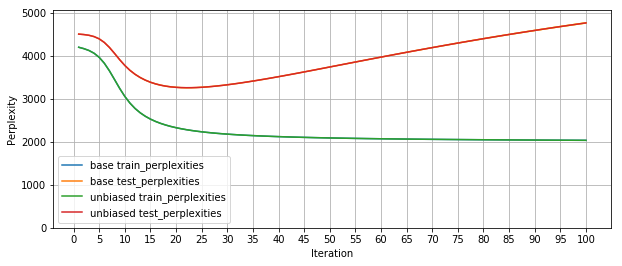

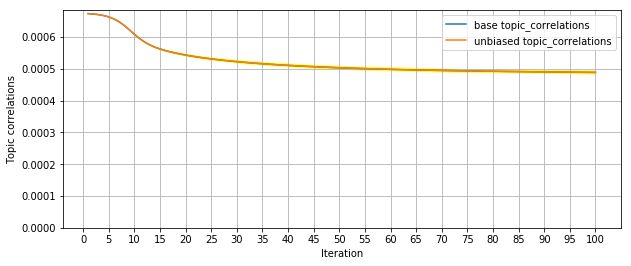

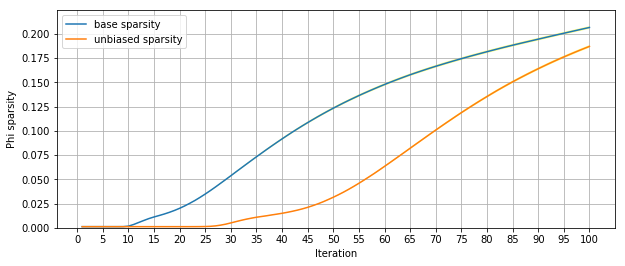

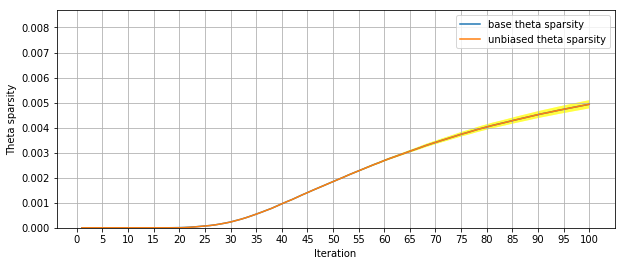

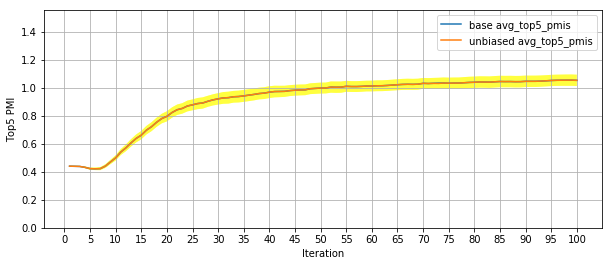

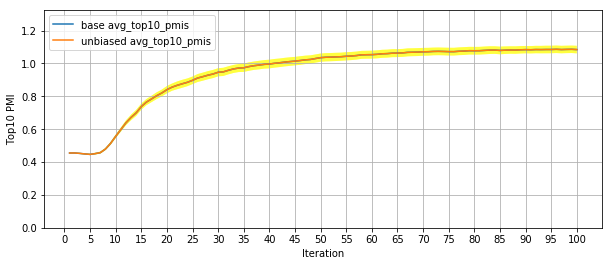

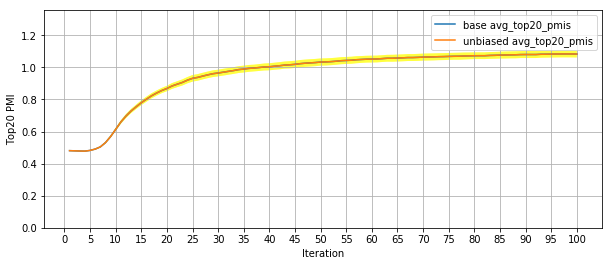

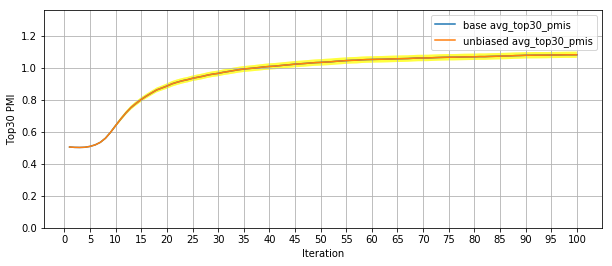

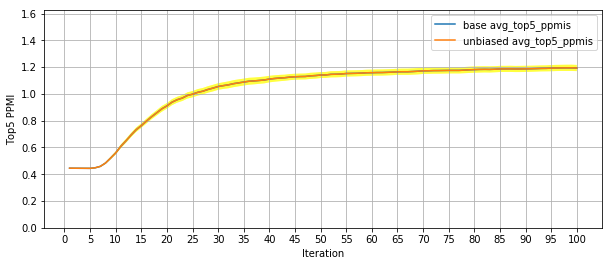

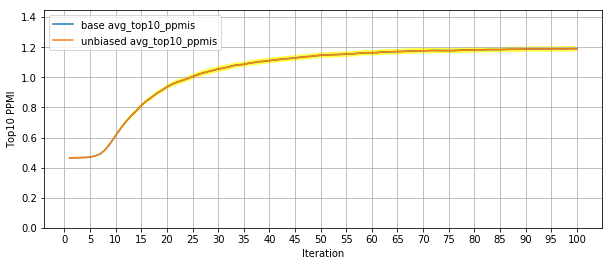

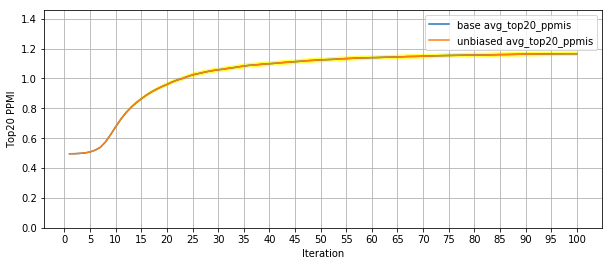

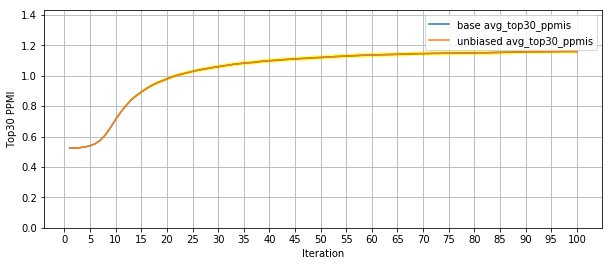

In [5]:
phi_experiment_res('20news_experiment/20news_10t_100000_0_True.pkl', '20news_experiment/20news_10t_100000_0_False.pkl')

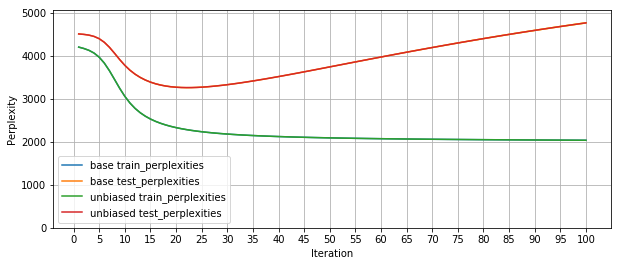

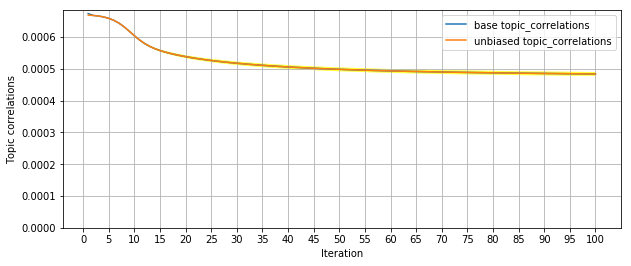

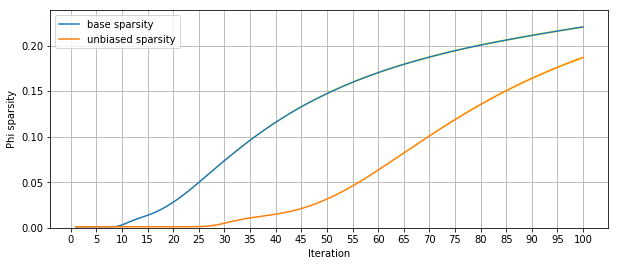

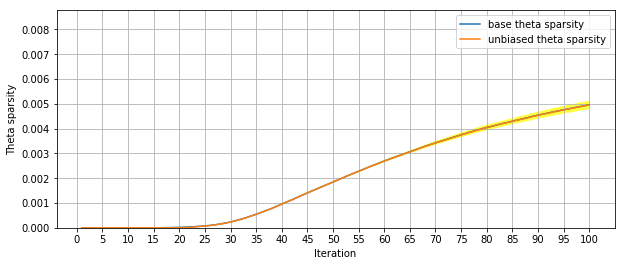

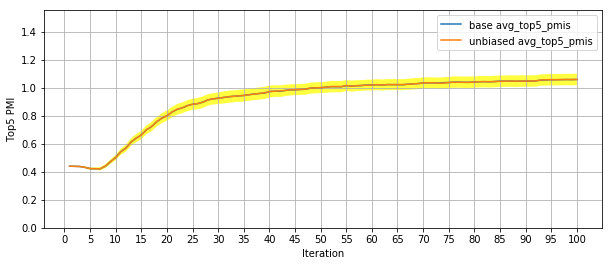

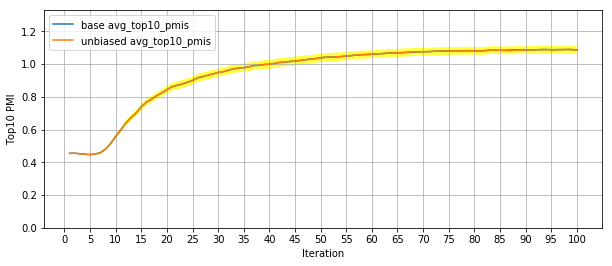

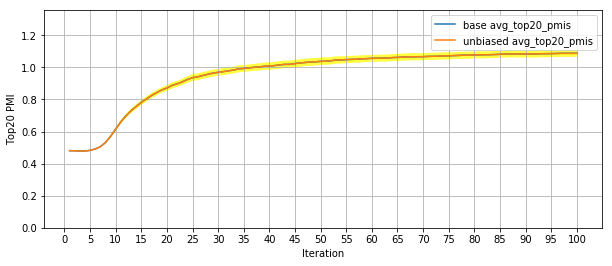

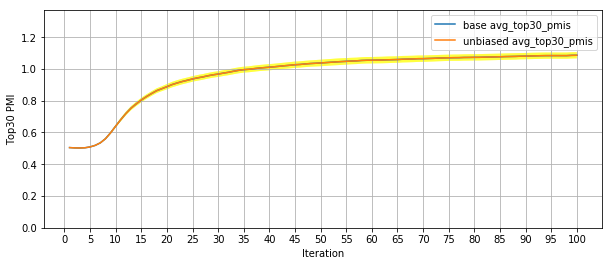

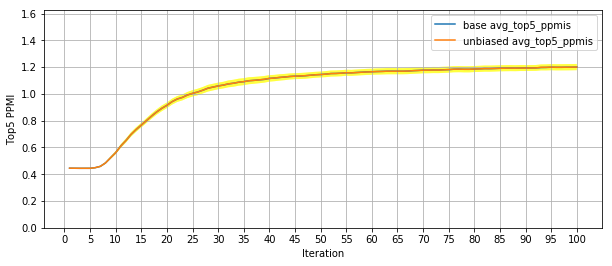

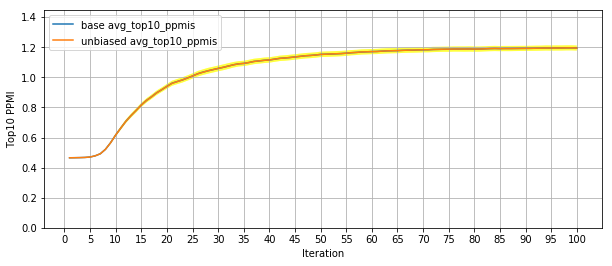

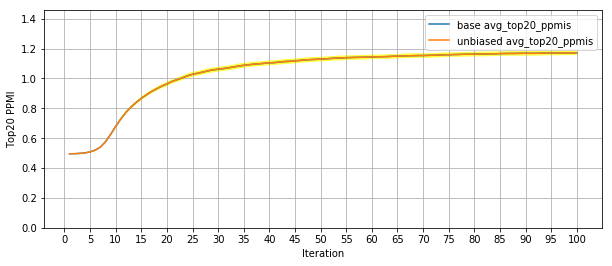

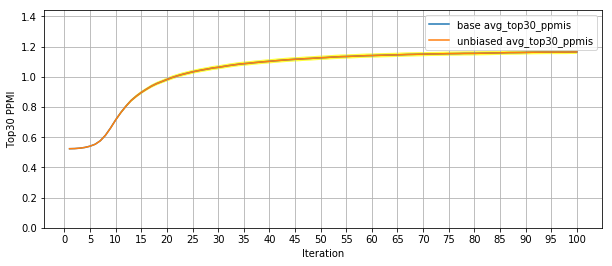

In [6]:
phi_experiment_res('20news_experiment/20news_10t_1000000_0_True.pkl', '20news_experiment/20news_10t_1000000_0_False.pkl')

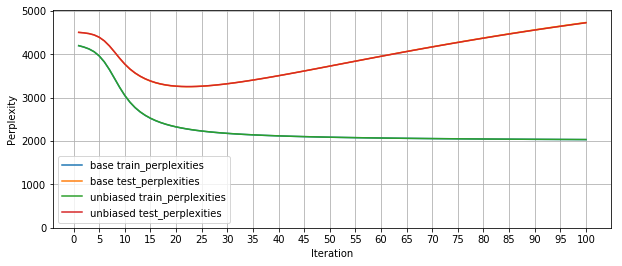

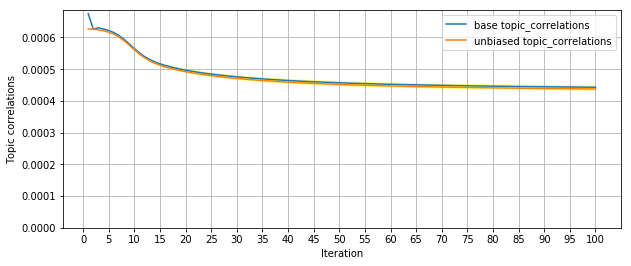

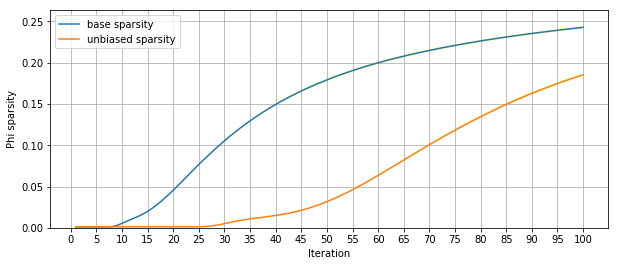

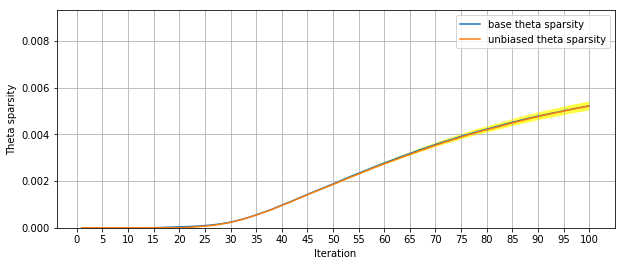

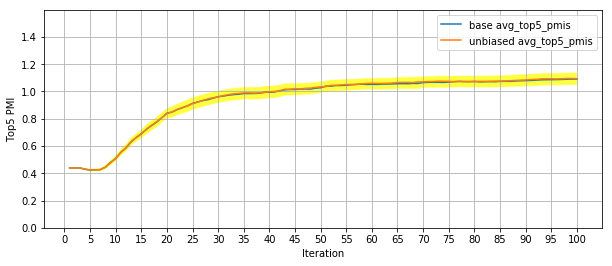

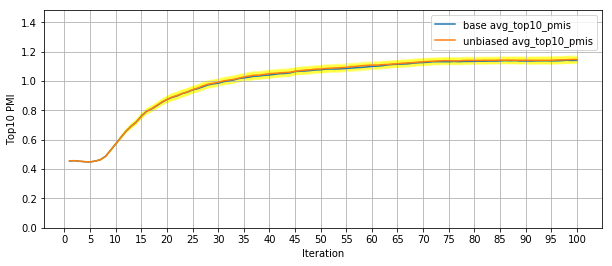

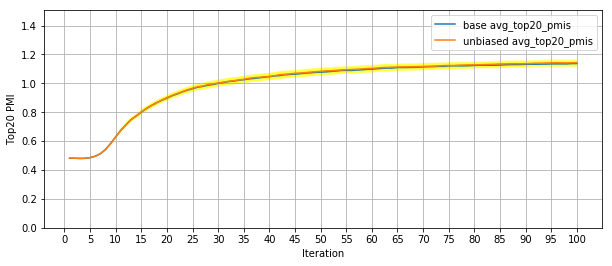

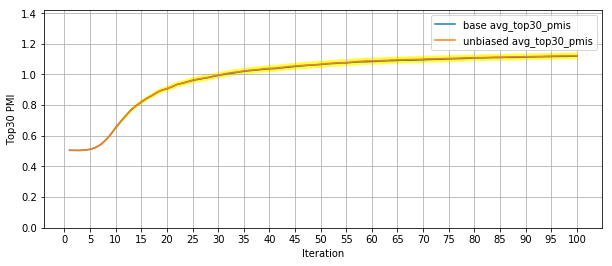

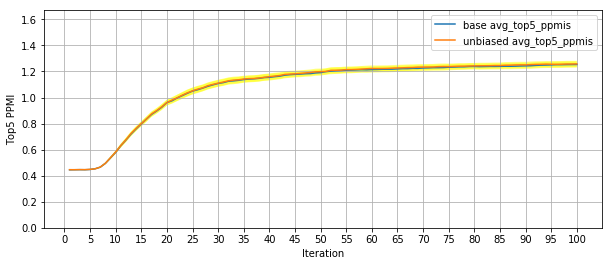

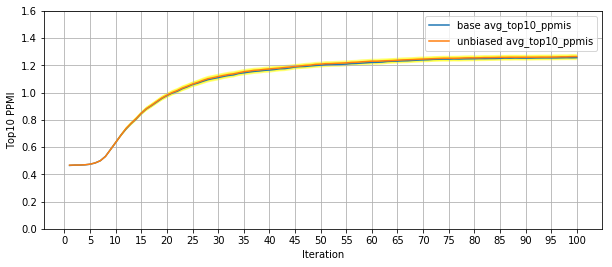

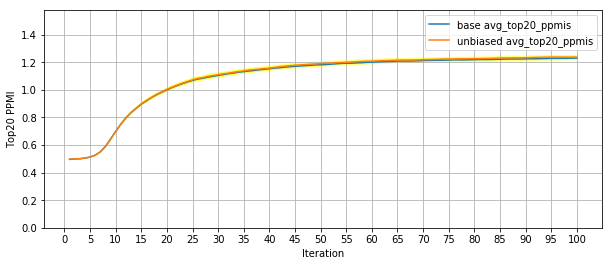

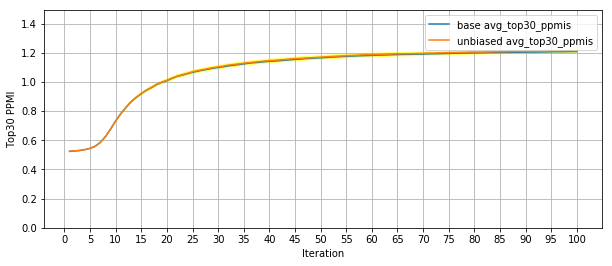

In [7]:
phi_experiment_res('20news_experiment/20news_10t_10000000_0_True.pkl', '20news_experiment/20news_10t_10000000_0_False.pkl')

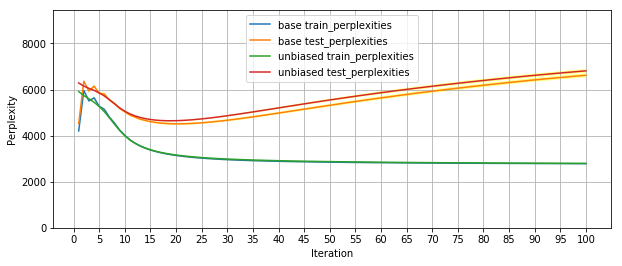

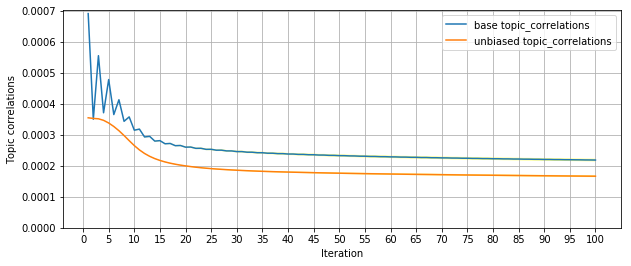

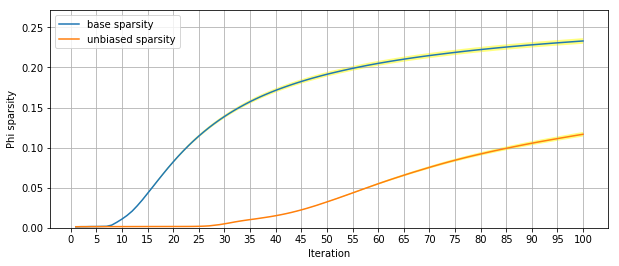

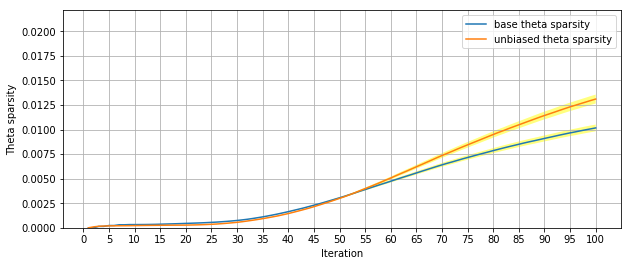

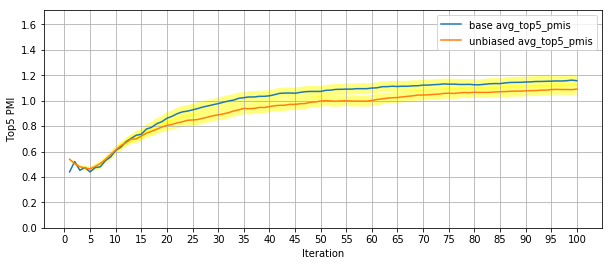

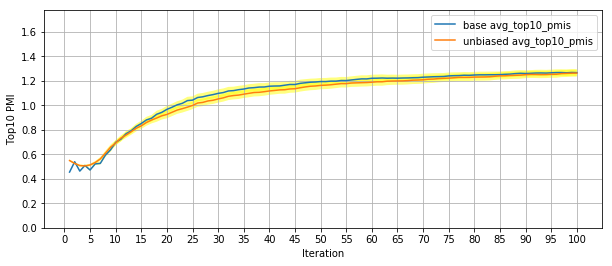

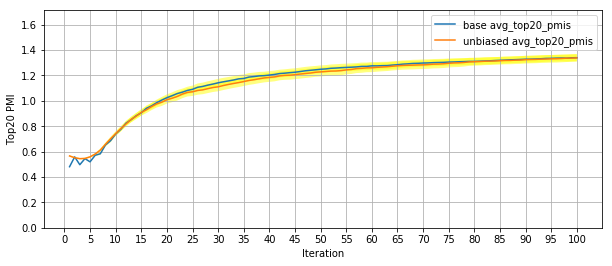

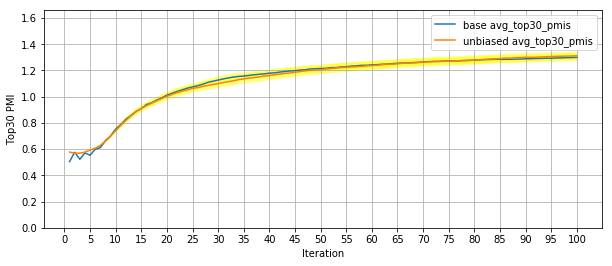

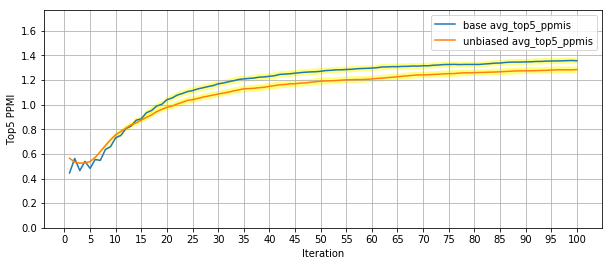

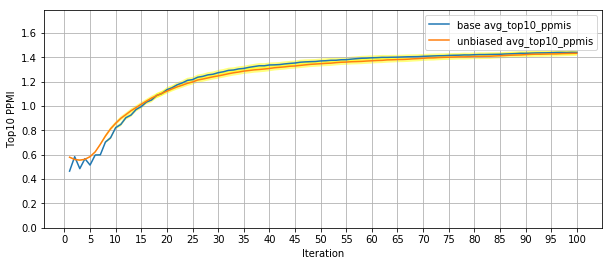

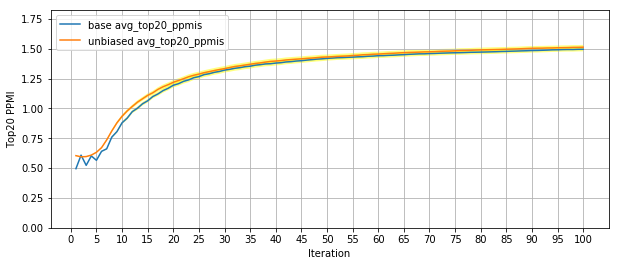

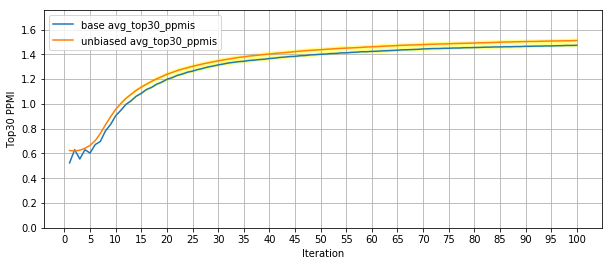

In [8]:
phi_experiment_res('20news_experiment/20news_10t_100000000_0_True.pkl', '20news_experiment/20news_10t_100000000_0_False.pkl')

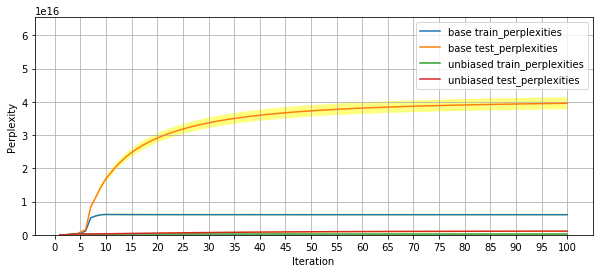

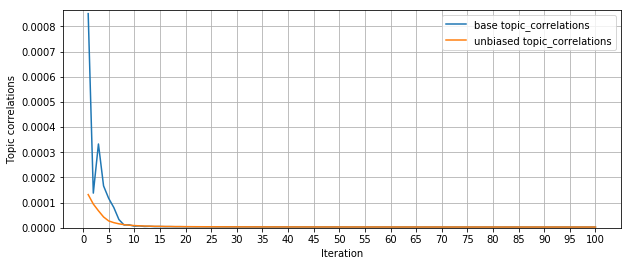

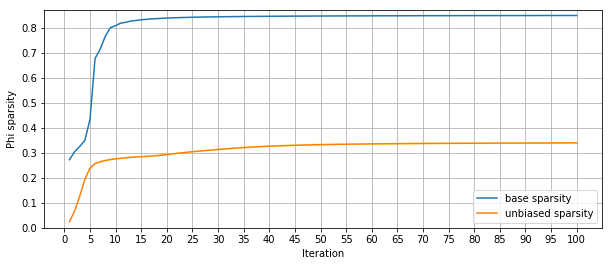

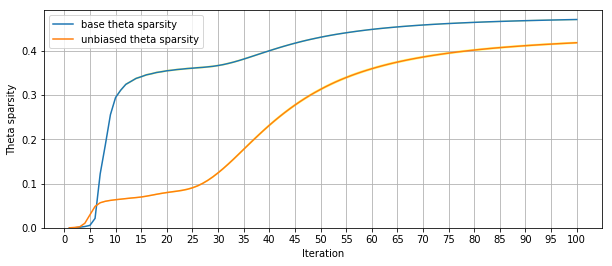

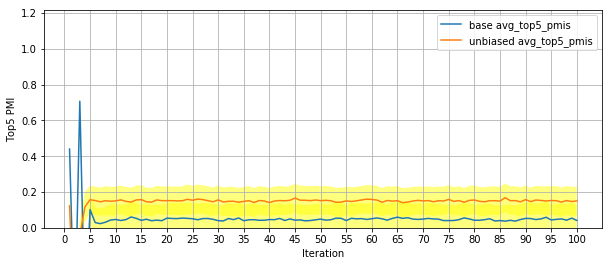

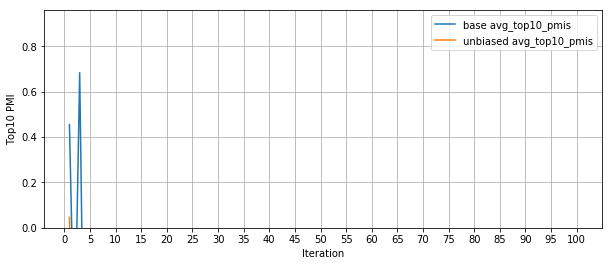

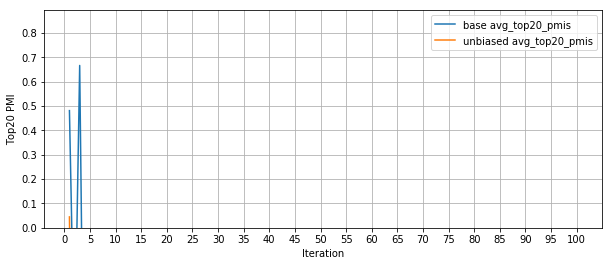

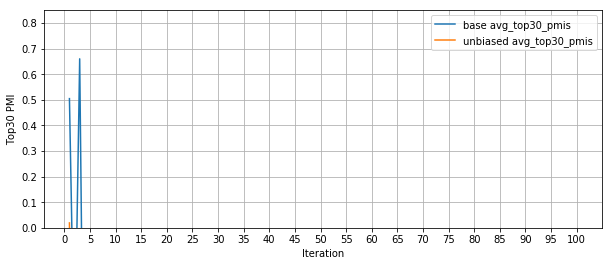

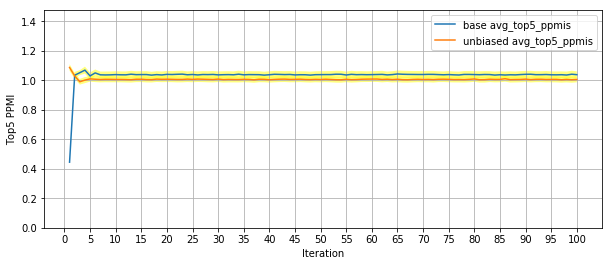

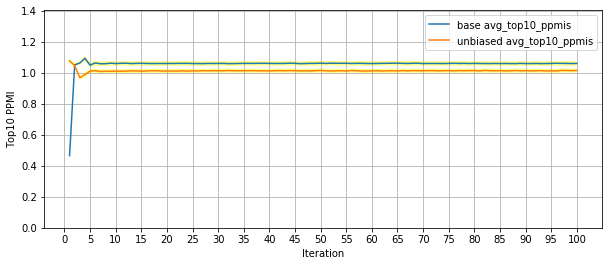

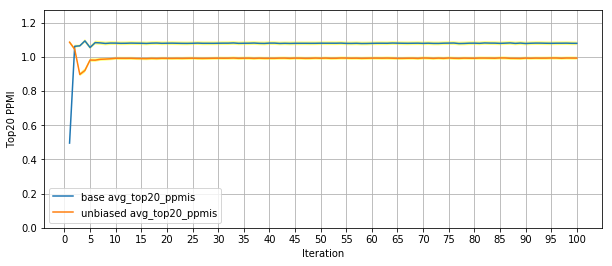

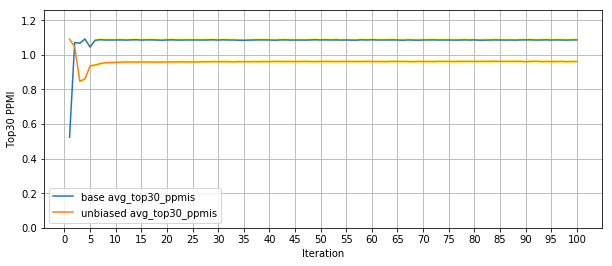

In [9]:
phi_experiment_res('20news_experiment/20news_10t_1000000000_0_True.pkl', '20news_experiment/20news_10t_1000000000_0_False.pkl')

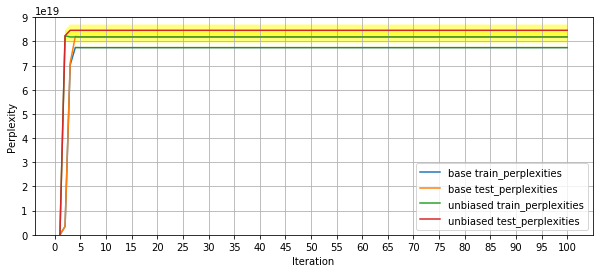

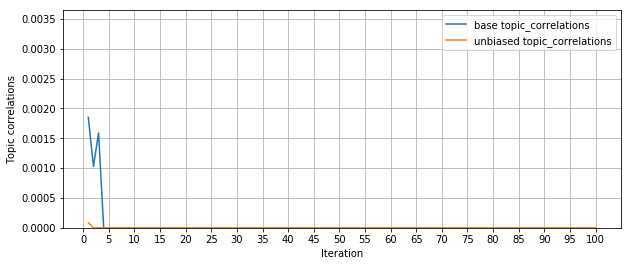

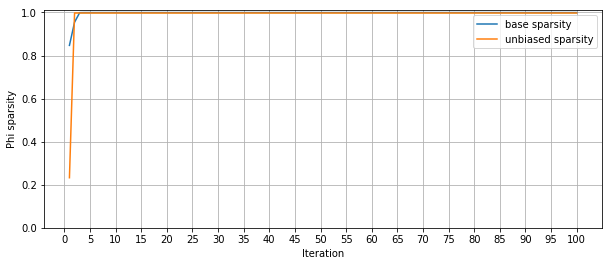

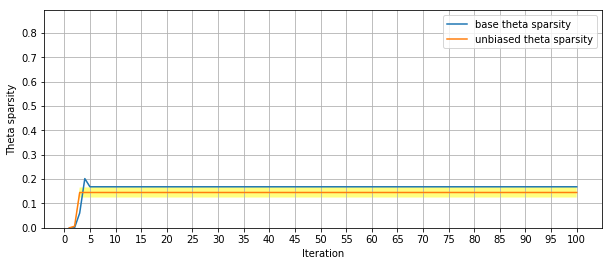

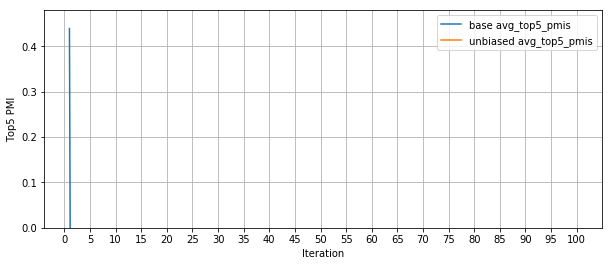

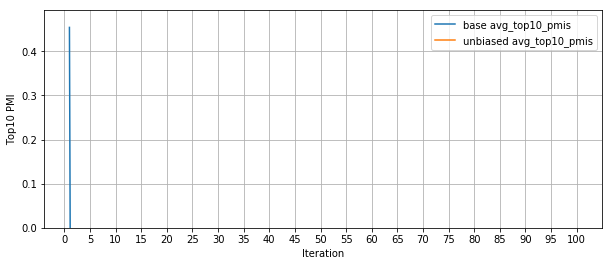

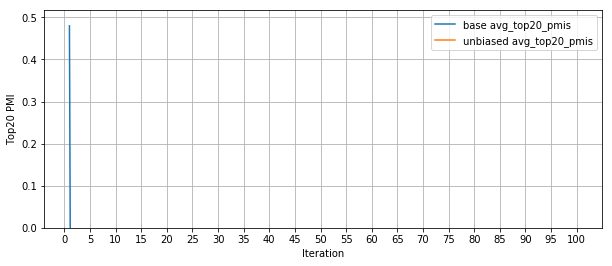

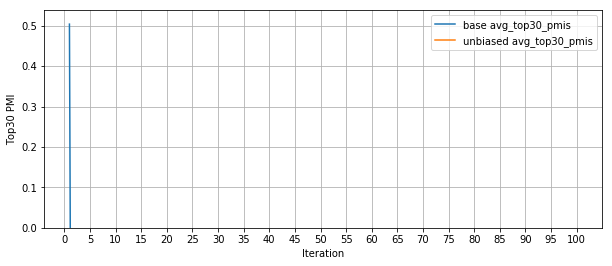

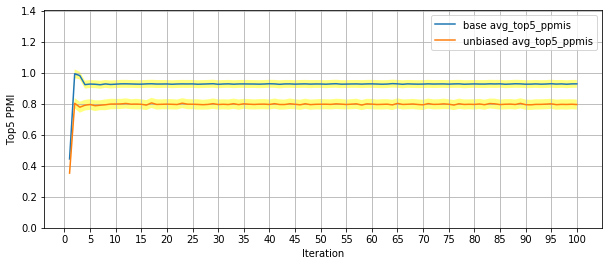

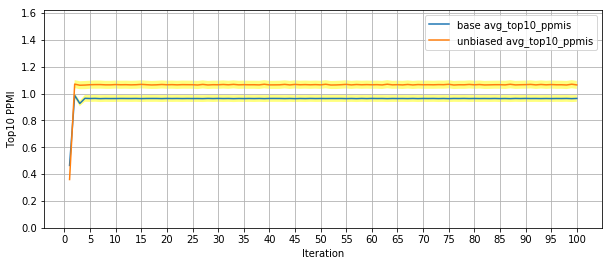

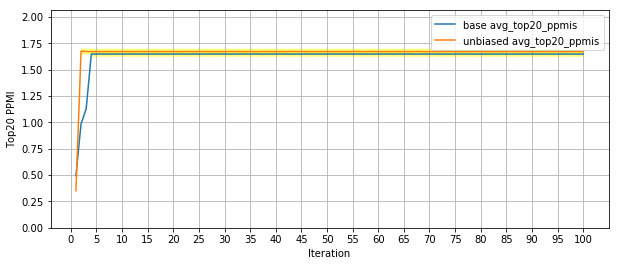

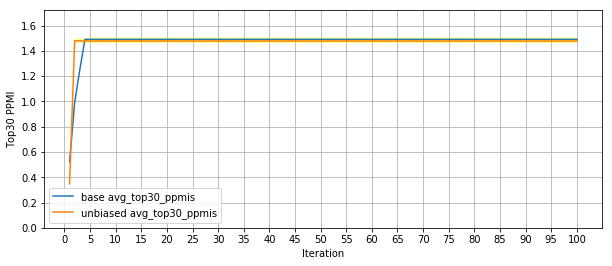

In [10]:
phi_experiment_res('20news_experiment/20news_10t_10000000000_0_True.pkl', '20news_experiment/20news_10t_10000000000_0_False.pkl')

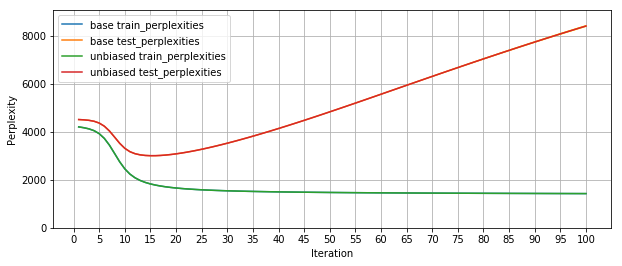

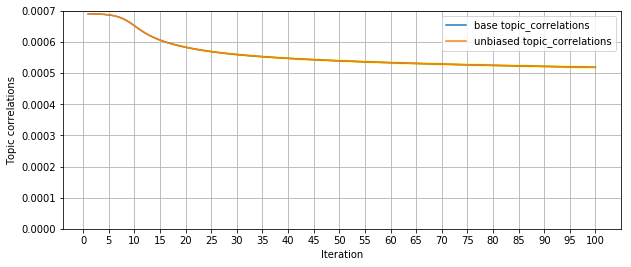

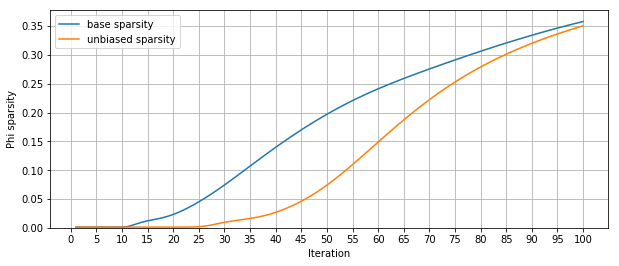

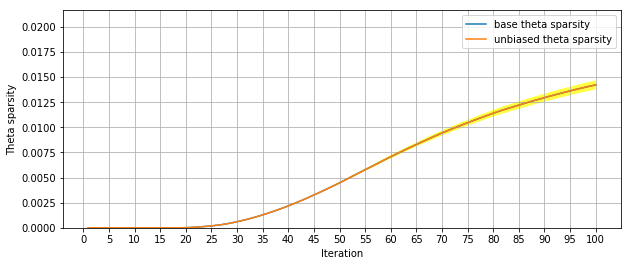

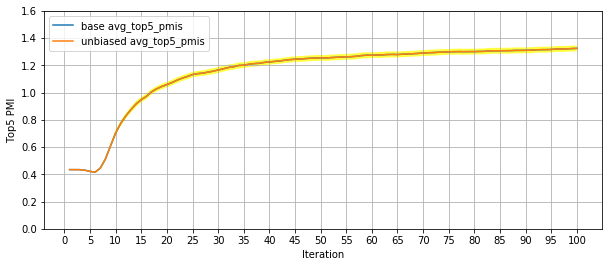

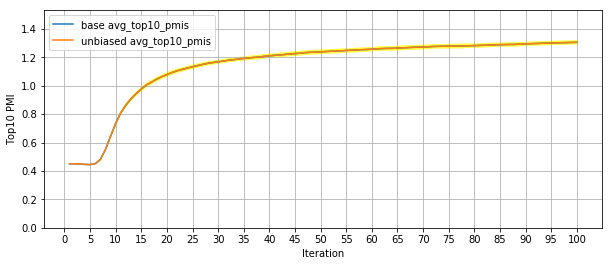

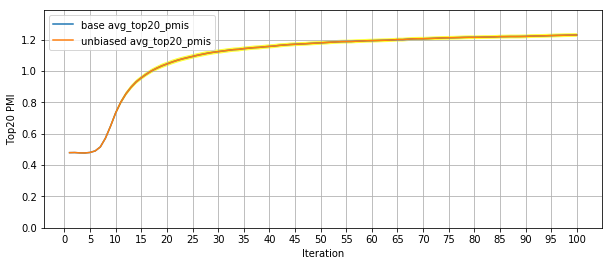

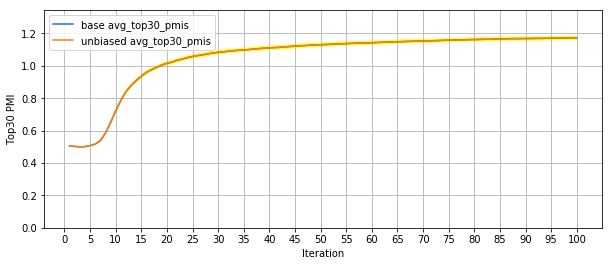

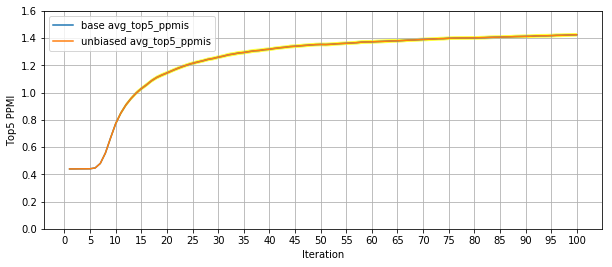

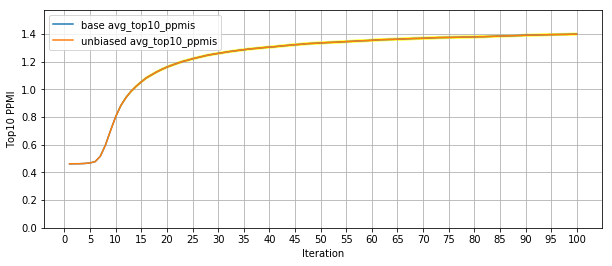

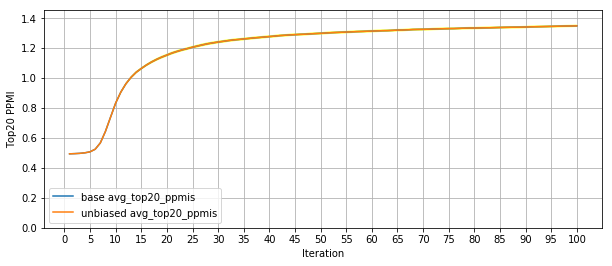

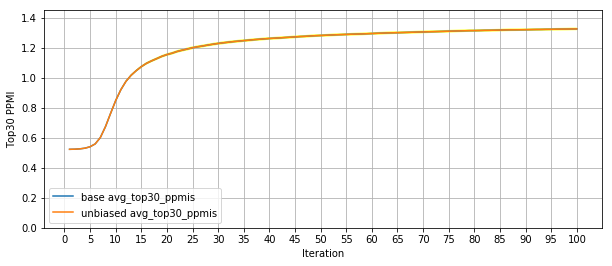

In [11]:
phi_experiment_res('20news_experiment/20news_30t_1000_0_True.pkl', '20news_experiment/20news_30t_1000_0_False.pkl')

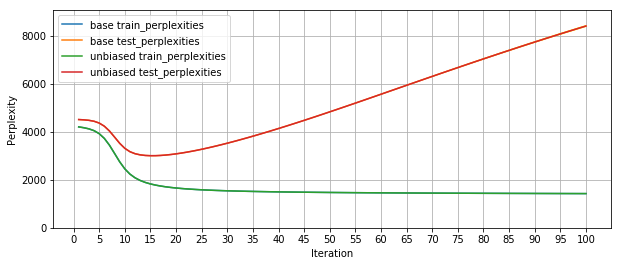

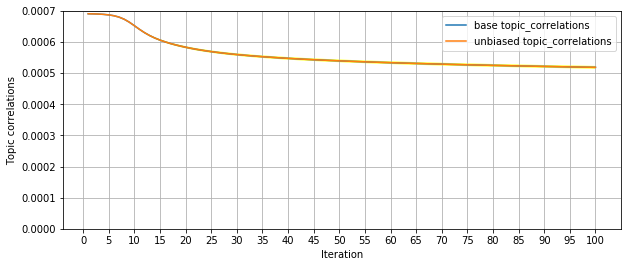

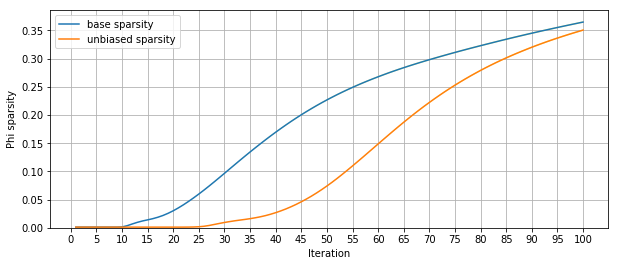

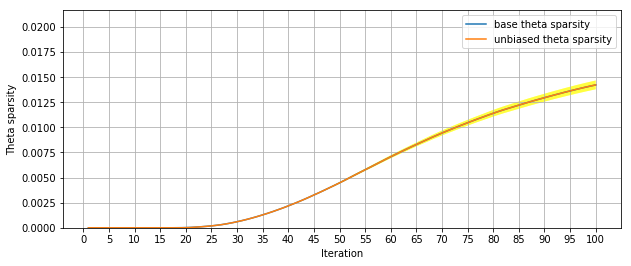

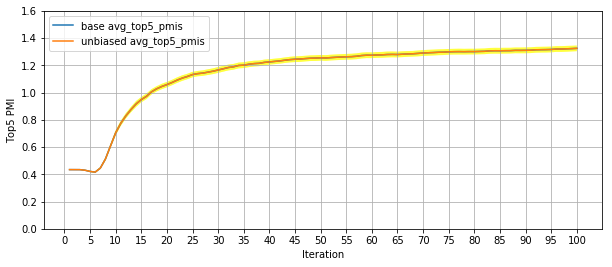

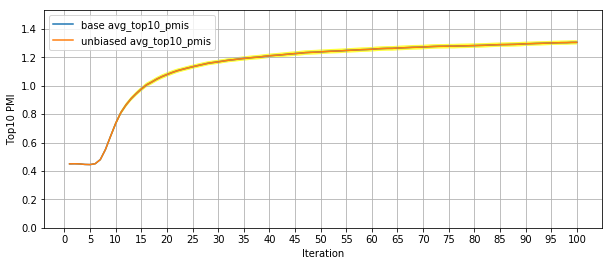

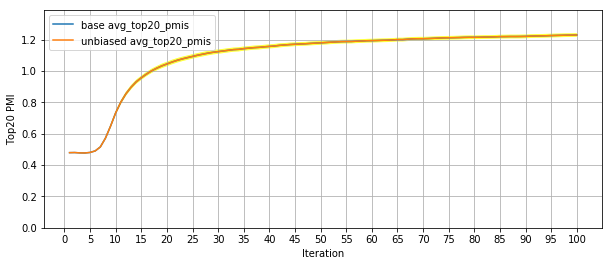

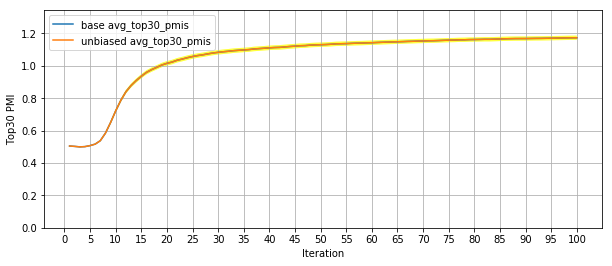

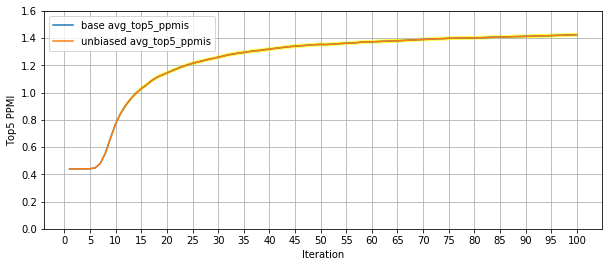

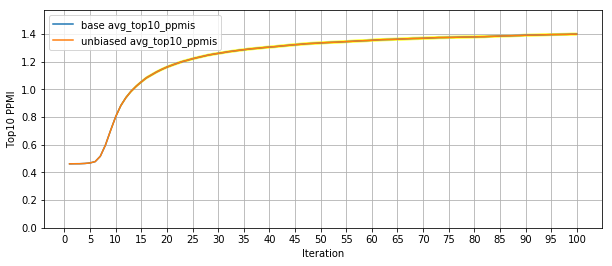

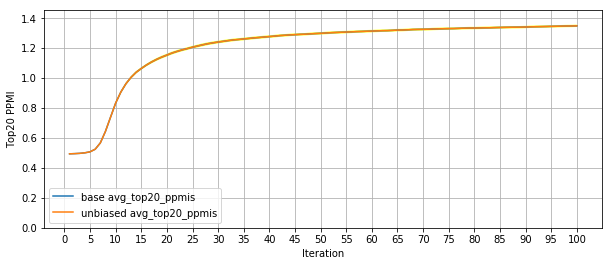

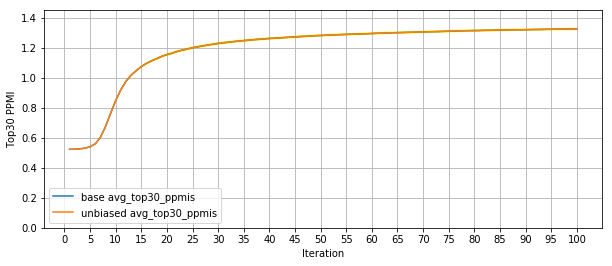

In [12]:
phi_experiment_res('20news_experiment/20news_30t_10000_0_True.pkl', '20news_experiment/20news_30t_10000_0_False.pkl')

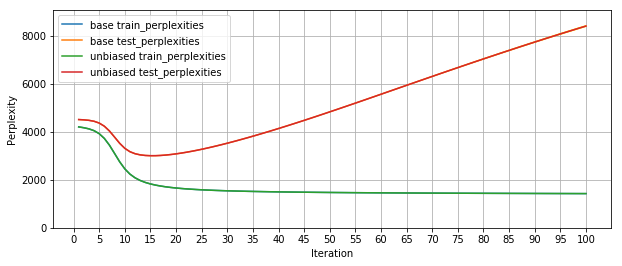

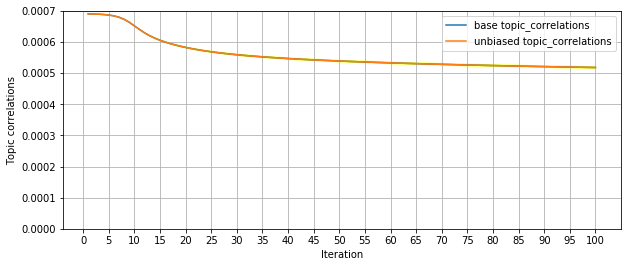

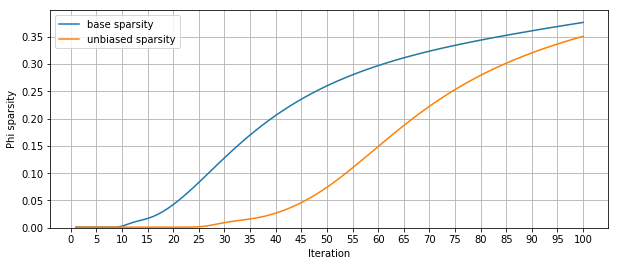

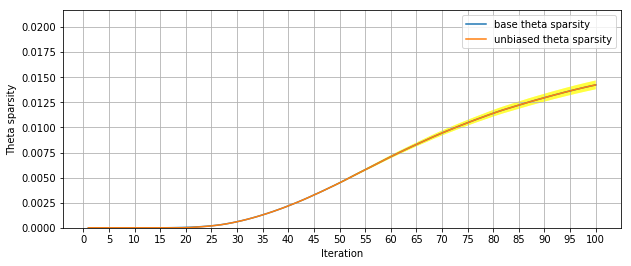

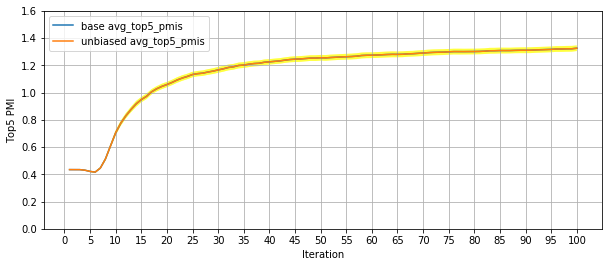

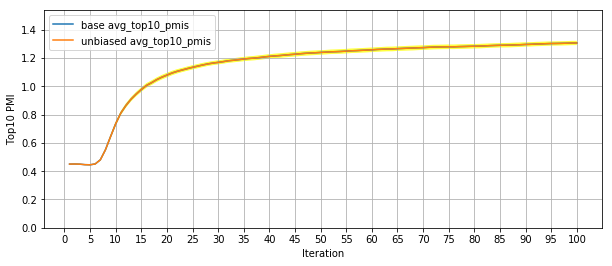

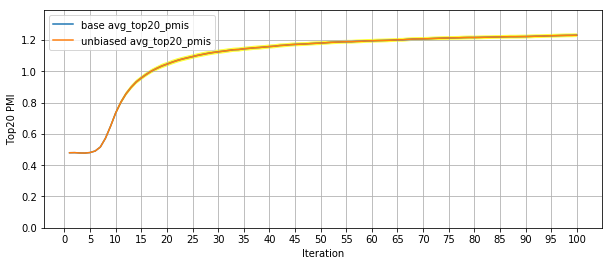

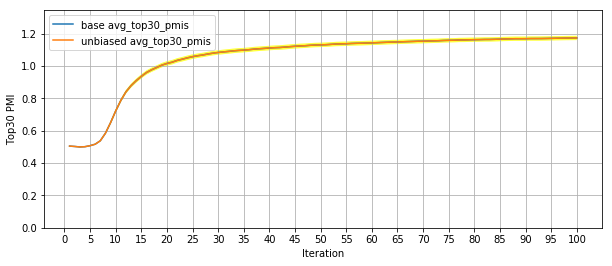

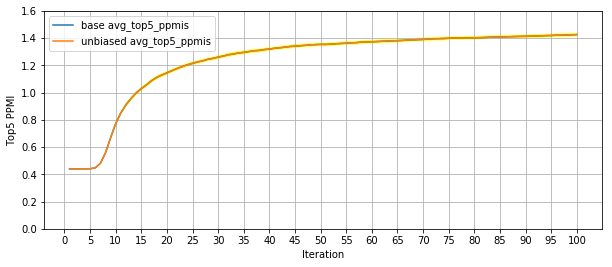

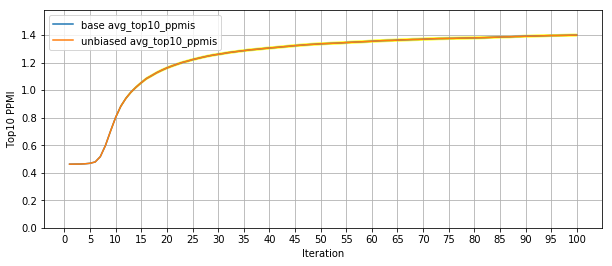

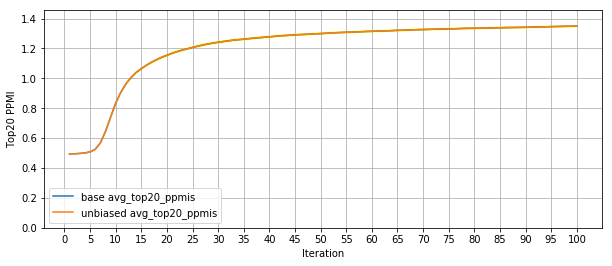

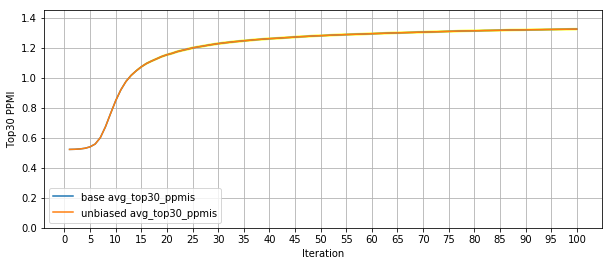

In [13]:
phi_experiment_res('20news_experiment/20news_30t_100000_0_True.pkl', '20news_experiment/20news_30t_100000_0_False.pkl')

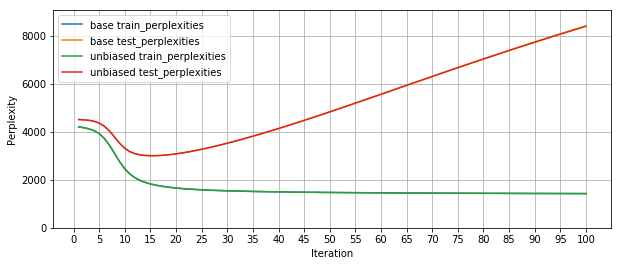

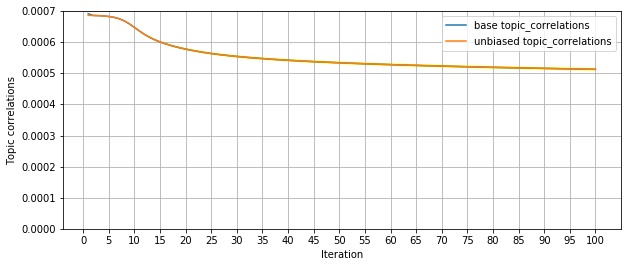

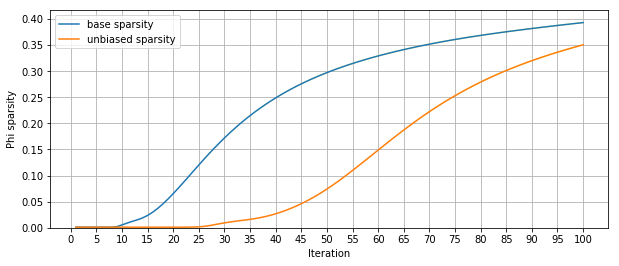

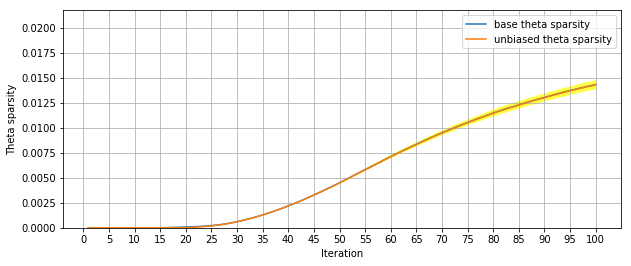

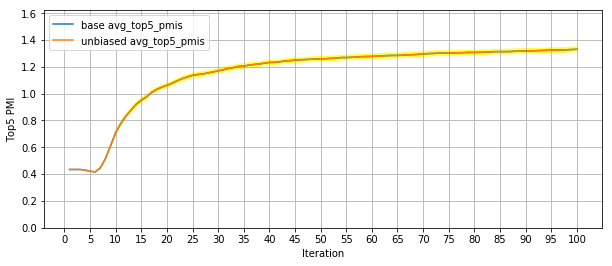

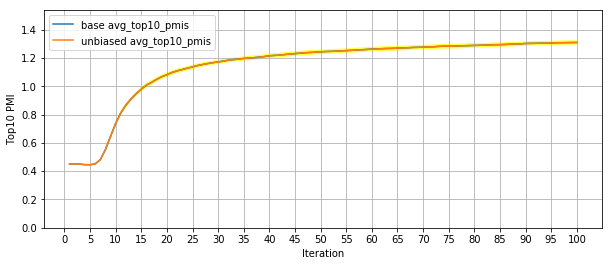

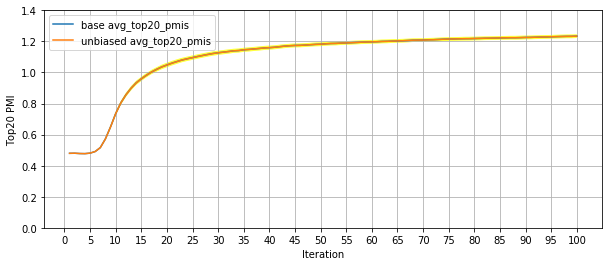

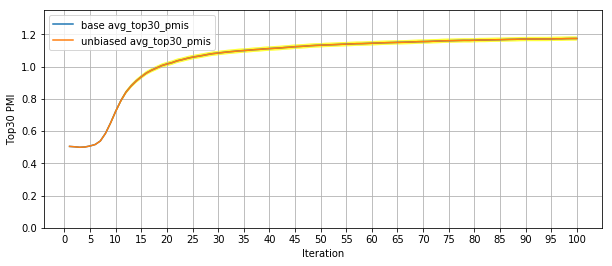

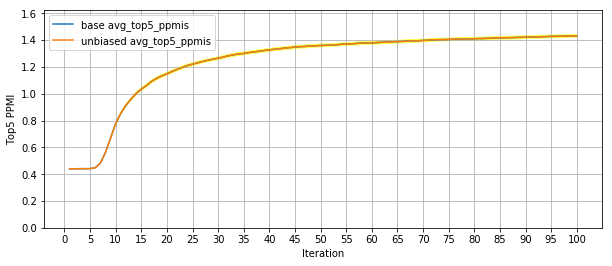

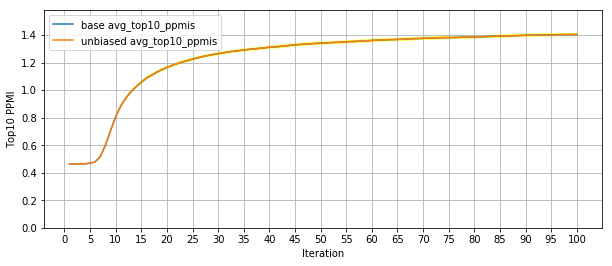

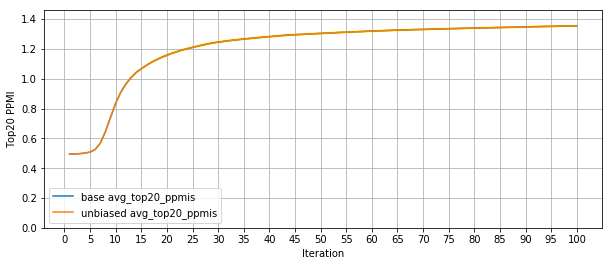

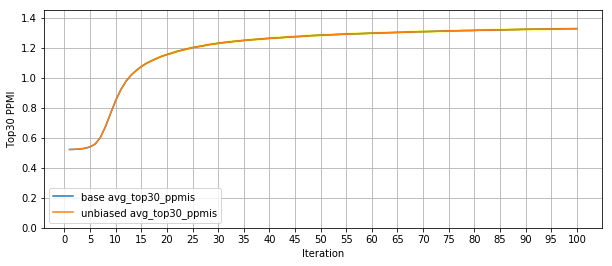

In [14]:
phi_experiment_res('20news_experiment/20news_30t_1000000_0_True.pkl', '20news_experiment/20news_30t_1000000_0_False.pkl')

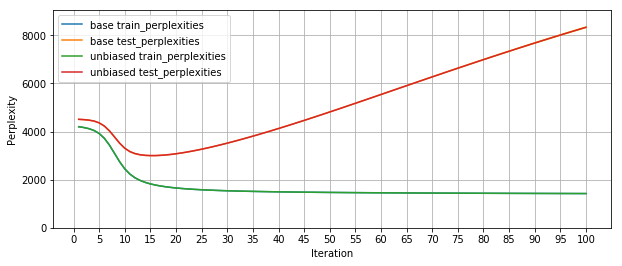

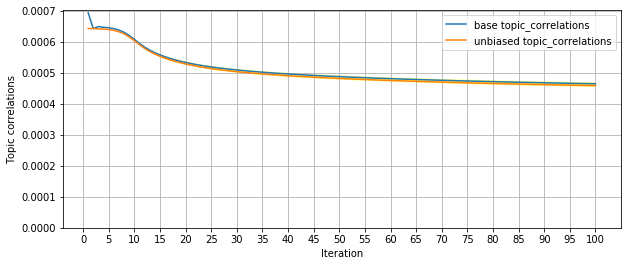

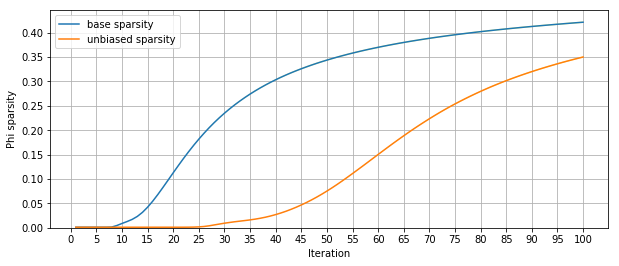

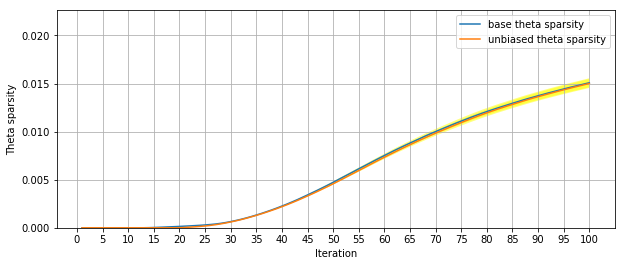

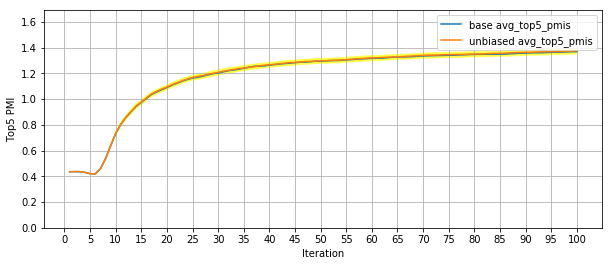

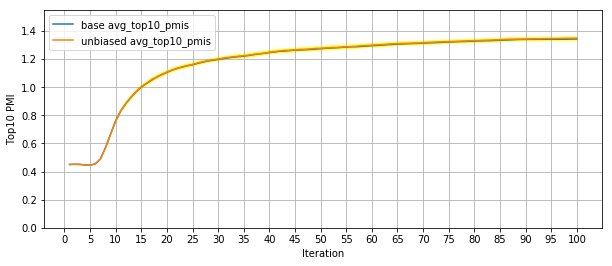

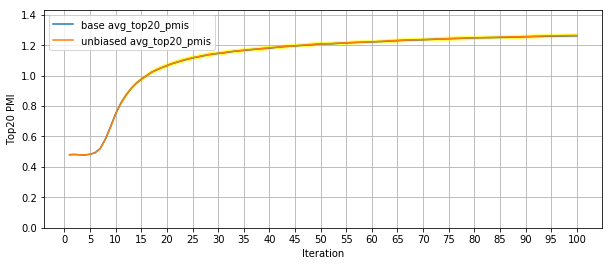

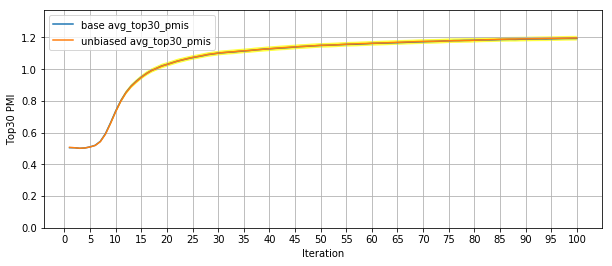

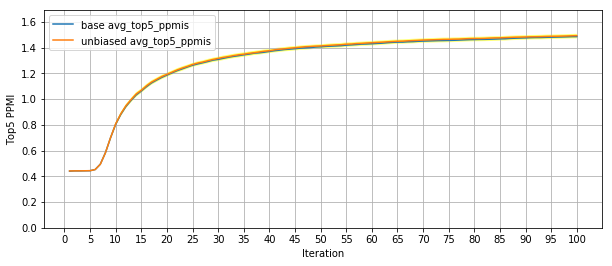

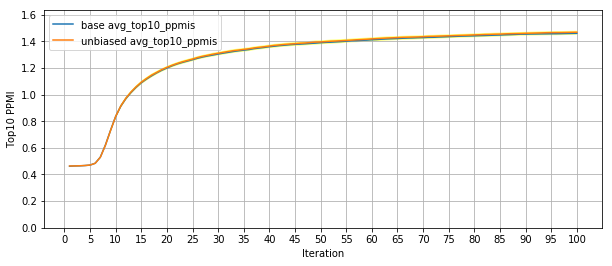

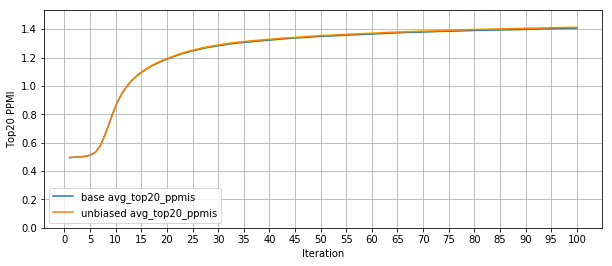

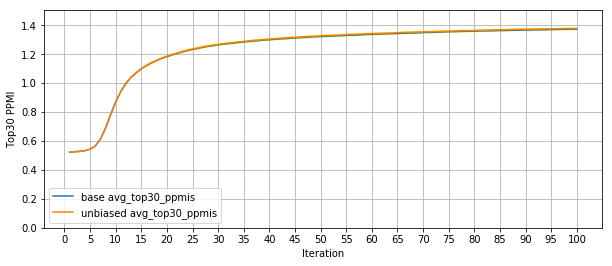

In [15]:
 phi_experiment_res('20news_experiment/20news_30t_10000000_0_True.pkl', '20news_experiment/20news_30t_10000000_0_False.pkl')

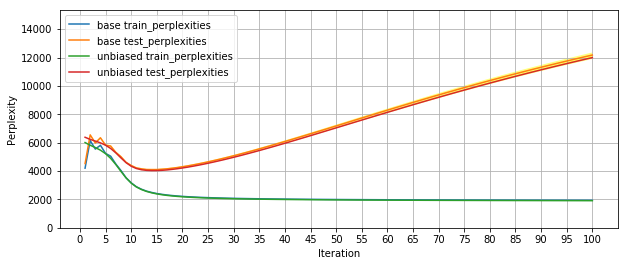

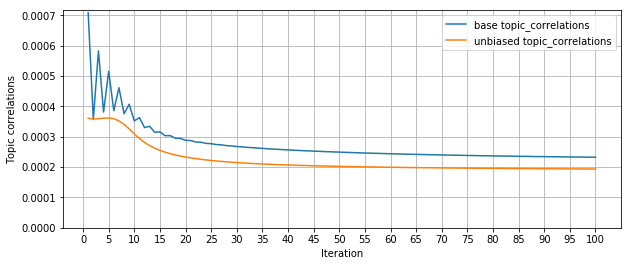

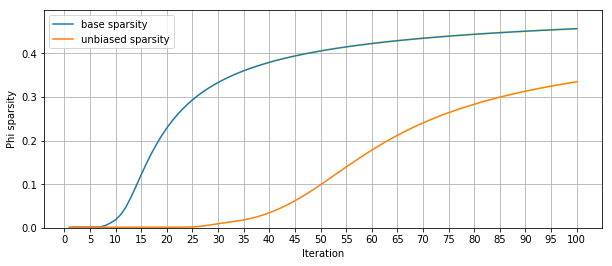

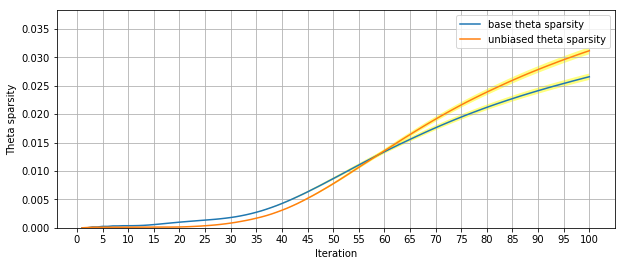

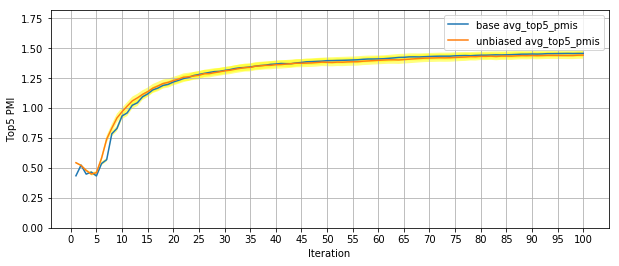

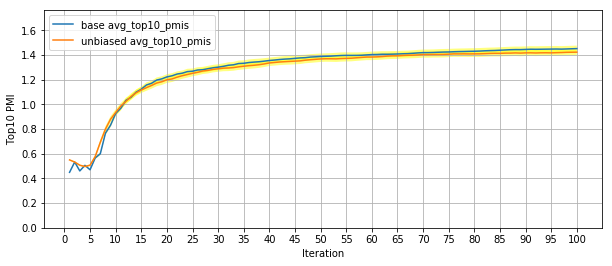

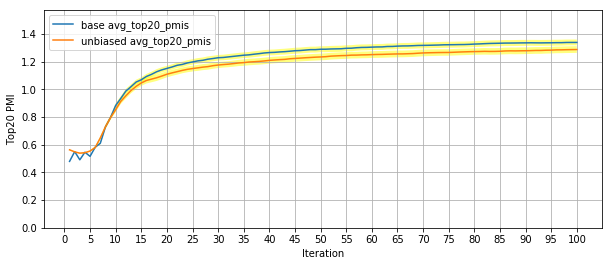

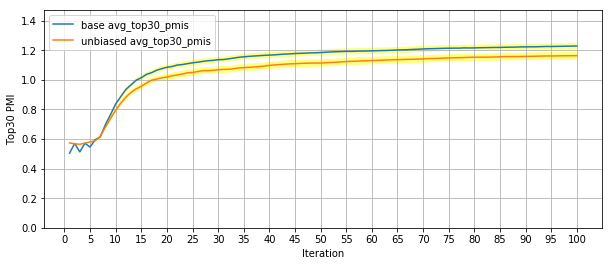

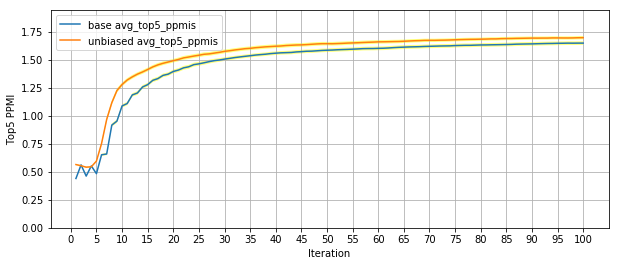

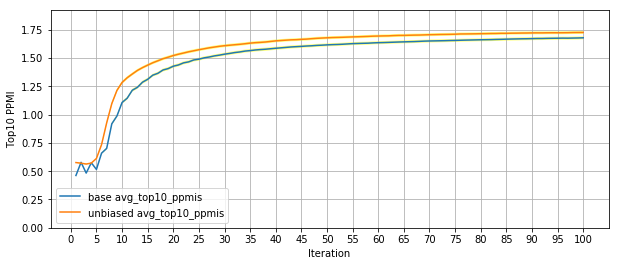

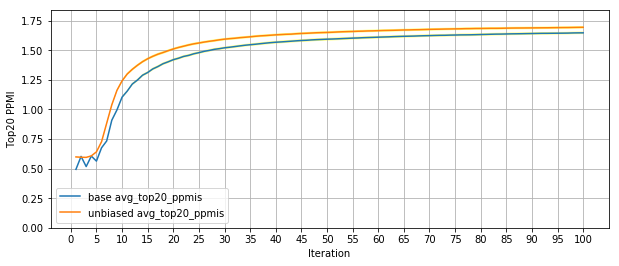

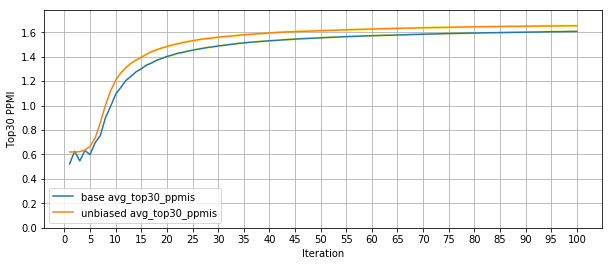

In [16]:
 phi_experiment_res('20news_experiment/20news_30t_100000000_0_True.pkl', '20news_experiment/20news_30t_100000000_0_False.pkl')    

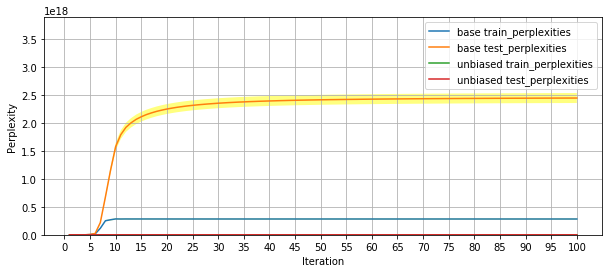

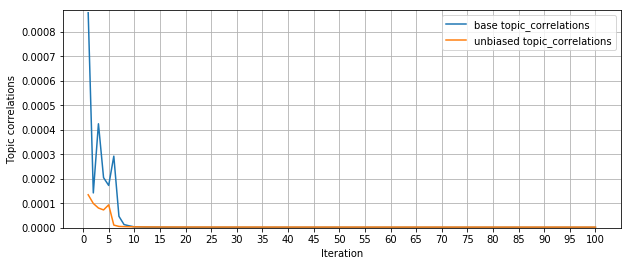

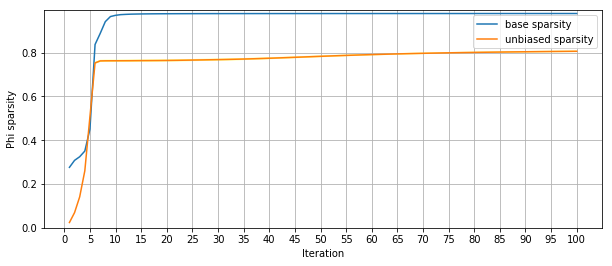

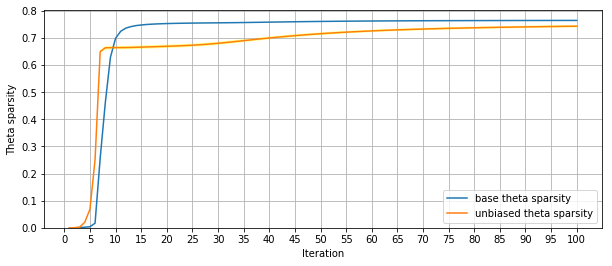

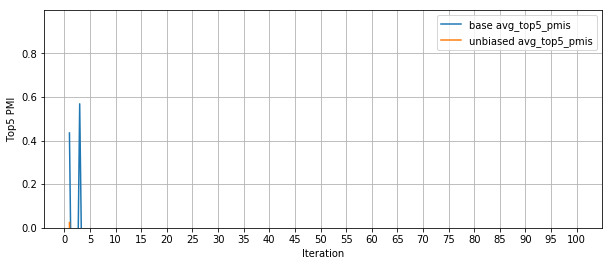

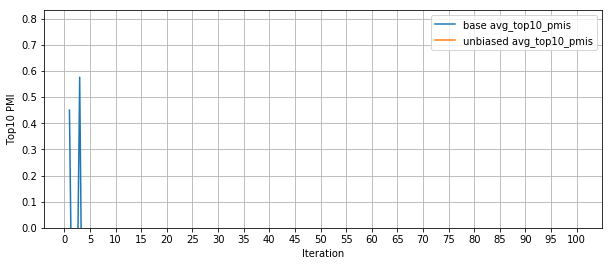

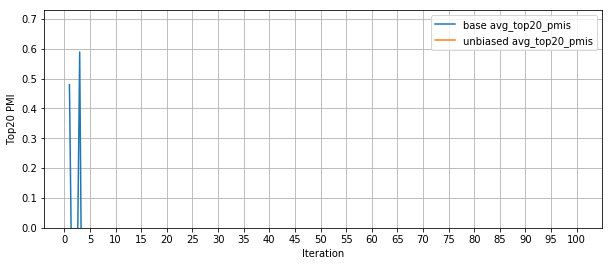

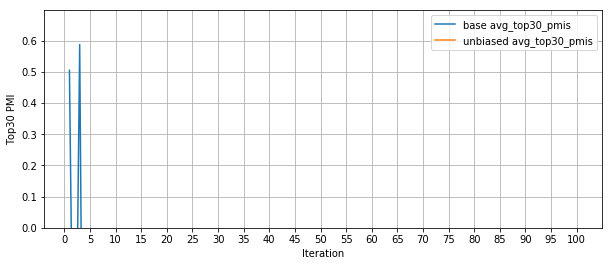

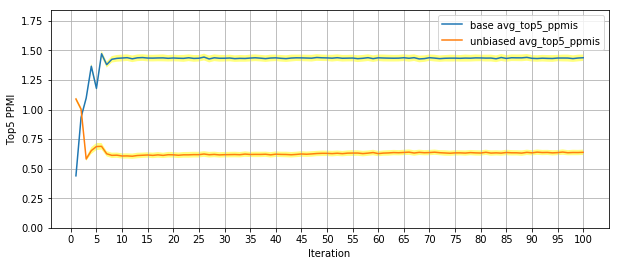

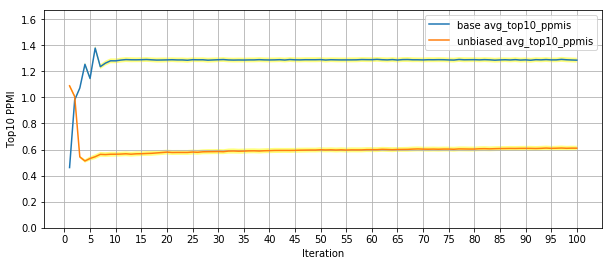

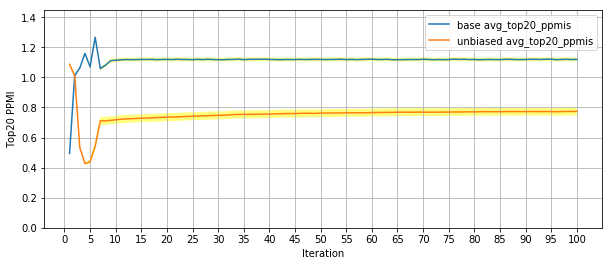

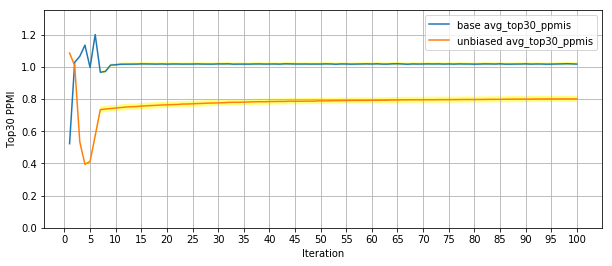

In [17]:
 phi_experiment_res('20news_experiment/20news_30t_1000000000_0_True.pkl', '20news_experiment/20news_30t_1000000000_0_False.pkl')    

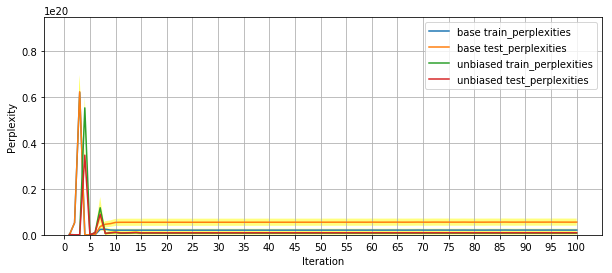

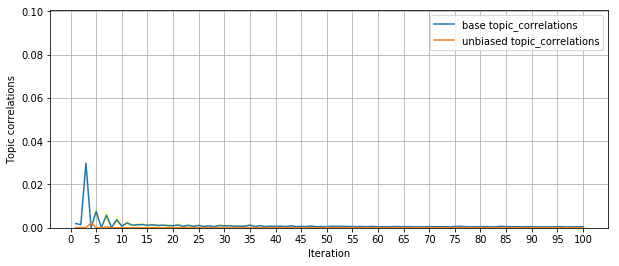

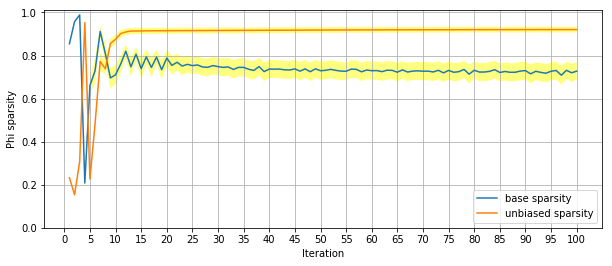

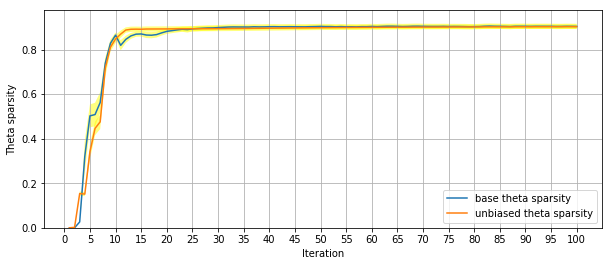

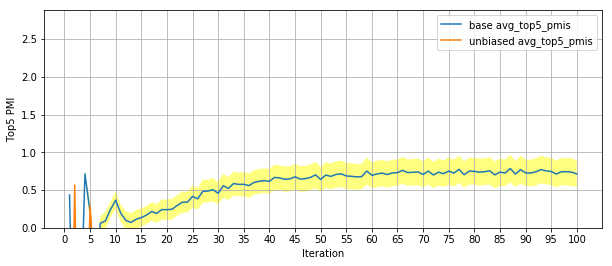

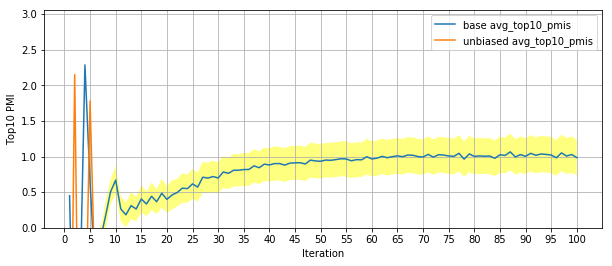

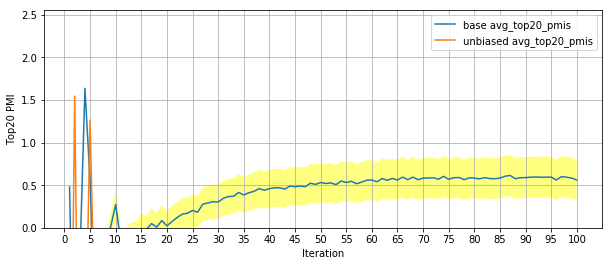

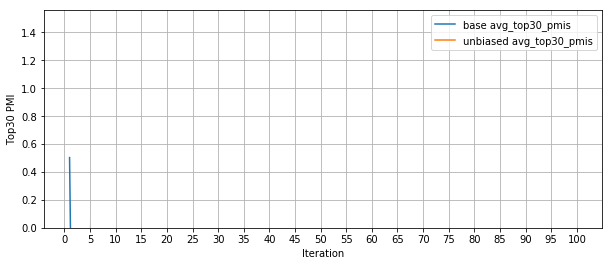

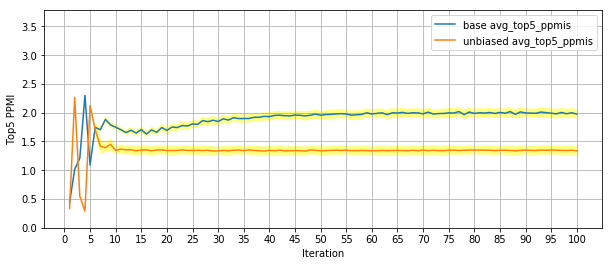

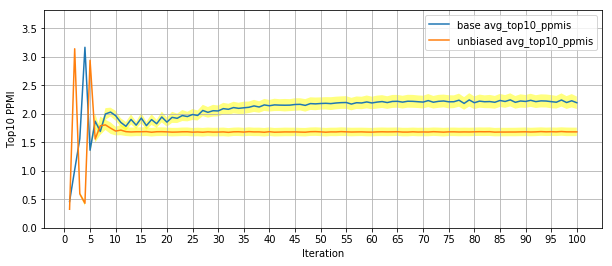

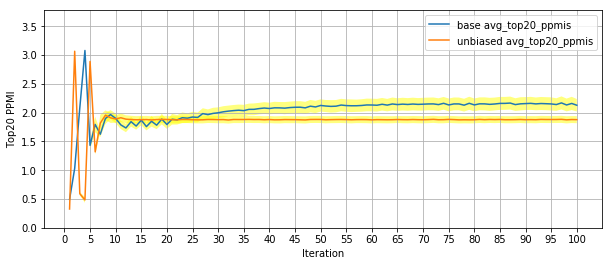

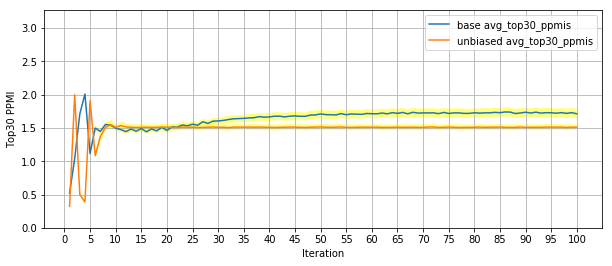

In [18]:
 phi_experiment_res('20news_experiment/20news_30t_10000000000_0_True.pkl', '20news_experiment/20news_30t_10000000000_0_False.pkl')    